In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
import time

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
inspector = inspect(engine)
columns = inspector.get_columns("measurement")
print("Table Measurement Columns:")
for col in columns:
    print(col["name"], col["type"])
print("----"*5)
columns = inspector.get_columns("station")
print("Table Station Columns:")
for col in columns:
    print(col["name"], col["type"])

Table Measurement Columns:
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
--------------------
Table Station Columns:
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
results = session.query(Station).all()
for res in results:
    print(res.id, res.station, res.name, res.latitude, res.longitude, res.elevation)
results = session.query(Measurement).limit(10).all()
for res in results:
    print(res.id, res.station, res.date, res.prcp, res.tobs)

1 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
2 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
3 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
4 USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
5 USC00518838 UPPER WAHIAWA 874.3, HI US 21.4992 -158.0111 306.6
6 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
7 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
8 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
9 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
1 USC00519397 2010-01-01 0.08 65.0
2 USC00519397 2010-01-02 0.0 63.0
3 USC00519397 2010-01-03 0.0 74.0
4 USC00519397 2010-01-04 0.0 76.0
5 USC00519397 2010-01-06 None 73.0
6 USC00519397 2010-01-07 0.06 70.0
7 USC00519397 2010-01-08 0.0 64.0
8 USC00519397 2010-01-09 0.0 68.0
9 USC00519397 2010-01-10 0.0 73.0
10 USC00519397 2010-01-11 0.01 64.0


In [12]:
max_date_in_dataset = session.query(func.max(Measurement.date)).filter(Measurement.station=="USC00511918").all()
max_date_in_dataset

[('2015-10-30')]

In [13]:
trip_start_date = dt.date(2015, 10, 17)
year_back = trip_start_date - dt.timedelta(days = 365)
year_back

datetime.date(2014, 10, 17)

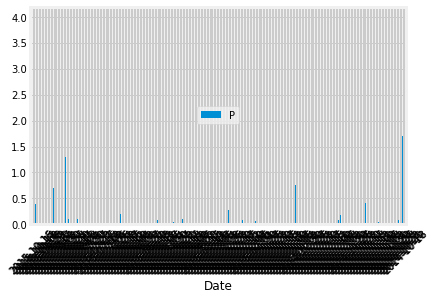

<Figure size 2160x504 with 0 Axes>

In [14]:
# Design a query to retrieve the last 12 months of precipitation data prior to your 
#trips start date and plot the results

# Perform a query to retrieve the date and prcp values for Honolulu station
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.station=="USC00511918").\
filter(func.strftime("%Y-%m-%d",Measurement.date)<= trip_start_date).\
filter(func.strftime("%Y-%m-%d", Measurement.date)> year_back).all()
    
# Save the query results as a Pandas DataFrame and set the index to the date column
result_list=[]
for res in results:
    result_list.append({"Date": res.date,
                       "Prcp": res.prcp})

df = pd.DataFrame(result_list)

df.set_index(["Date"], inplace=True)

# Sort the dataframe by date
df.sort_values(by="Date", ascending=False, inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(kind="bar")
plt.legend("Perceptation", loc="center")
plt.xlabel("Date")

# Rotate the xticks for the dates
plt.xticks(rotation=45)
plt.figure(figsize=(30,7))
plt.tight_layout()
plt.show()

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Prcp
count,215.000000
mean,0.061349
std,0.324958
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,4.000000


In [16]:
# How many stations are available in this dataset?
station_count = session.query(Station.id).count()
station_count

9

In [17]:
# What are the most active stations?
# List the stations and the counts in descending order.
results = session.query(Measurement.station, func.count(Measurement.id)).group_by(Measurement.station).order_by(func.count(Measurement.id).desc())
for res in results:
    print(res)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [18]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
results = session.query(func.max(Measurement.tobs), func.min(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station=="USC00519281")

for res in results:
    print(res)
print(results[0])

(85.0, 54.0, 71.66378066378067)
(85.0, 54.0, 71.66378066378067)


('USC00519397',)
('USC00519397',)
('USC00513117',)
('USC00513117',)
('USC00514830',)
('USC00519523',)
('USC00519281',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)


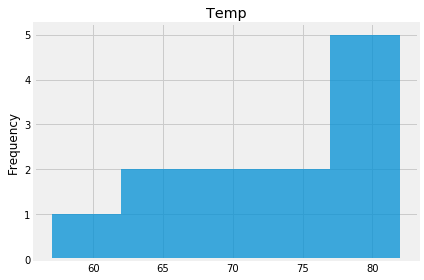

In [37]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data previous to your 
# trips start date for this station and plot the results as a histogram
results = session.query(Measurement.station).filter(Measurement.tobs==85.0)
for res in results:
    print(res)
    
results = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station=="USC00511918").filter(Measurement.date>"2014-10-17").\
filter(Measurement.date<="2015-10-17").group_by(func.strftime("%m", Measurement.date))

results_list = []
for res in results:
    results_list.append({"Date": res.date, "Temp": res.tobs})
    
df = pd.DataFrame(results_list)
df.set_index("Date", inplace=True)
df.head()
df.hist(bins="auto", alpha=0.75)
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_start_date = time.strftime("%Y-%m-%d",(2015, 10, 17,0,0,0,0,0,0))
year_back = time.strftime("%Y-%m-%d",(2014, 10, 17,0,0,0,0,0,0))
#calc_temps(trip_start_date, year_back)
trip_start_date
year_back
calc_temps(year_back, trip_start_date)

In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
